In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
data=pd.read_csv("employee.csv")
data.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


#Rows and Columns of data

In [2]:
data.shape

(9, 7)

#Finding the columns

In [3]:
data.columns

Index(['name', 'age', 'income', 'gender', 'department', 'grade',
       'performance_score'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


#FInding the Null values

In [5]:
data.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

we have two null values each in age,gender and income

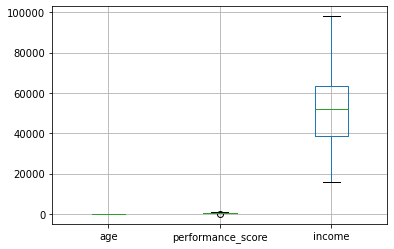

In [6]:
boxplot = data.boxplot(column=['age','performance_score','income'])

# Reset the index as "name"

In [7]:
data.set_index('name', inplace=True)
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# Select rows for specific names Jack Morgan and Josh wills

In [8]:
data.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# Select data for multiple values "Sales" and “Finance”.

In [9]:
data_new = data[data['department'].isin(['Sales', 'Finance'])]
data_new

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# Display employee who has more than 700 performance score.

In [10]:
data[data['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# Display employee who has more than 500 and less than 700 performance score

In [11]:
data[(data['performance_score']>500) & (data['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# Check and handle missing values in the dataset.

In [12]:
data.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [14]:
# filling the missing values in Income with median value

for i in ['income']:
    data[i]=data[i].fillna(data[i].median())

In [15]:
# filling the missing value in Gender with mode value

data['gender'] = data['gender'].fillna(data['gender'].mode()[0])
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,F,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [16]:
# filling the missing value in age with 0

data=data.fillna(0)

In [17]:
data.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

In [18]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,0.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,0.0,62000.0,F,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# Check the outliers and handle outliers in performance score using Percentiles

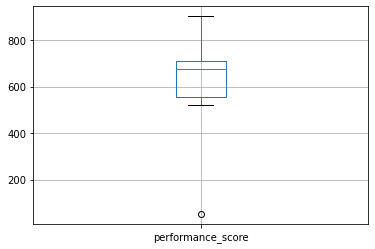

In [19]:
boxplot = data.boxplot(column=['performance_score'])

From the above boxplots,we know that perfomance score has outliers

In [20]:
#Removing outliers from Performance score 
Q1=np.percentile(data['performance_score'],25,interpolation='midpoint')
Q2=np.percentile(data['performance_score'],50,interpolation='midpoint')
Q3=np.percentile(data['performance_score'],75,interpolation='midpoint')

In [21]:
print("Q1=",Q1,'\nQ2=',Q2,'\nQ3=',Q3)

Q1= 556.0 
Q2= 674.0 
Q3= 711.0


In [22]:
IQR=Q3-Q1

In [23]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("lower limit is",low_lim)
print("Upper limit is",up_lim)

lower limit is 323.5
Upper limit is 943.5


In [24]:
outlier=[]
for x in data['performance_score']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [25]:
outlier

[53]

In [26]:
ind1=data['performance_score']<low_lim
data.loc[ind1].index

Index(['James Authur'], dtype='object', name='name')

In [27]:
data.drop(['James Authur'],inplace=True)

In [29]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,0.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,0.0,62000.0,F,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# Check the gender column and do Dummy encoding

In [30]:
dummy_gender=pd.get_dummies(data,columns=['gender'],drop_first=True)
dummy_gender

,age,income,department,grade,performance_score,gender_M
name,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,723,0
S Kumar,0.0,16000.0,Finance,G0,520,0
Jack Morgan,32.0,35000.0,Finance,G2,674,1
Ying Chin,45.0,65000.0,Sales,G3,556,0
Dheeraj Patel,30.0,42000.0,Operations,G2,711,0
Satyam Sharma,0.0,62000.0,Sales,G3,649,0
Josh Wills,54.0,52000.0,Finance,G3,901,0
Leo Duck,23.0,98000.0,Sales,G4,709,1


# Do the standard scaling on the feature performance score

In [31]:
from sklearn import preprocessing
standardisation=preprocessing.StandardScaler()
data['performance_score']=standardisation.fit_transform(data[['performance_score']])
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,0.392262
S Kumar,0.0,16000.0,F,Finance,G0,-1.475872
Jack Morgan,32.0,35000.0,M,Finance,G2,-0.058667
Ying Chin,45.0,65000.0,F,Sales,G3,-1.144578
Dheeraj Patel,30.0,42000.0,F,Operations,G2,0.281831
Satyam Sharma,0.0,62000.0,F,Sales,G3,-0.288733
Josh Wills,54.0,52000.0,F,Finance,G3,2.030331
Leo Duck,23.0,98000.0,M,Sales,G4,0.263425
